In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm 
from pathlib import Path
from functools import partial
%matplotlib inline
%reload_ext autoreload
%autoreload 2

from acab import juteUtils as jut
from acab import hotplot as hp

# Probability histogram 

Is the probability normalized?: 1=1.0000000000000007, 1=1.0000000000000007


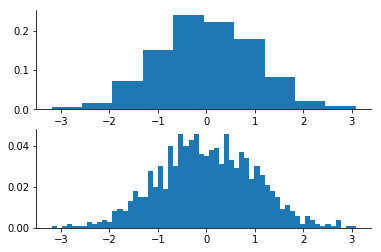

In [2]:
ran = np.random.standard_normal(1000)
f, axs = plt.subplots(2)
out0 = hp.histProb(ran, axs[0])
out1 = hp.histProb(ran, axs[1], bins=60)
print('Is the probability normalized?: 1={}, 1={}'.format(out0[0].sum(), out1[0].sum()))

# Pcolor plot with zero as white

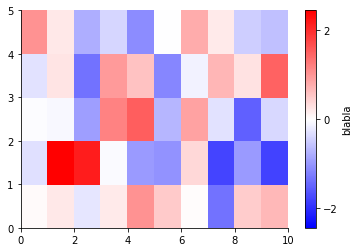

In [3]:
N, M = 10, 5 
ran = np.random.standard_normal(N*M).reshape(N, M)
f, axs = plt.subplots(1)
hp.pcolor_zerowhite(f, axs, ran.T, cLabel='blabla')

## If it only contains positive or negative values it automatically splits the colormap

-> CONSISTENT COLORS

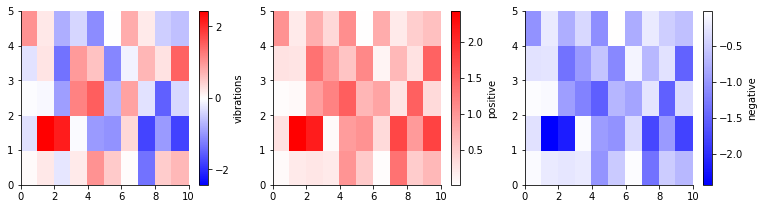

In [4]:
f, axs = plt.subplots(1, 3, figsize=0.8*plt.figaspect(1/4))
partPcolor = partial(hp.pcolor_zerowhite, f)
partPcolor(axs[0], ran.T, cLabel='vibrations')
partPcolor(axs[1], np.abs(ran.T), cLabel='positive')
partPcolor(axs[2], -np.abs(ran.T), cLabel='negative')

### Can also be used with anyother colormap (default is cm.bwr) 

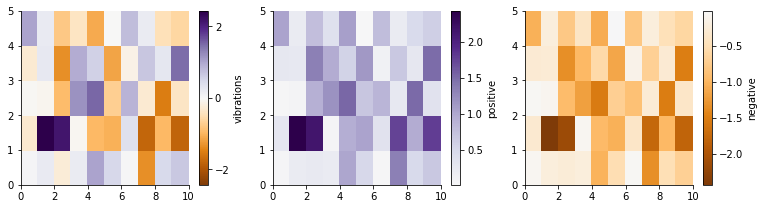

In [5]:
f, axs = plt.subplots(1, 3, figsize=0.8*plt.figaspect(1/4))
partPcolor = partial(hp.pcolor_zerowhite, f, cmap=cm.PuOr)
partPcolor(axs[0], ran.T, cLabel='vibrations')
partPcolor(axs[1], np.abs(ran.T), cLabel='positive')
partPcolor(axs[2], -np.abs(ran.T), cLabel='negative')

# Automatic labeling 

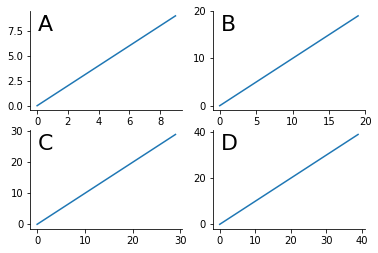

In [6]:
f, axs = plt.subplots(2, 2)
axs = axs.flatten()
for i, ax in enumerate(axs): 
    ax.plot(range(10*(i+1)))
hp.abc_plotLabels([0.05, 0.8], axs)

## abc can be replaced with list

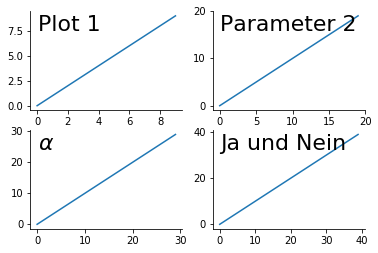

In [7]:
f, axs = plt.subplots(2, 2)
axs = axs.flatten()
for i, ax in enumerate(axs): 
    ax.plot(range(10*(i+1)))
newABC = ['Plot 1', 'Parameter 2', r'$\alpha$', 'Ja und Nein']
hp.abc_plotLabels([0.05, 0.8], axs, abc=newABC)

# Vertical- or horizontal lines spanning FULL plot

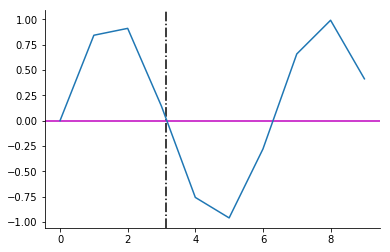

In [8]:
f, axs = plt.subplots(1)
axs.plot(np.sin(range(10)))
hp.vlinesFull(np.pi, axs, linestyle='-.')
hp.hlinesFull(0, axs, color='m')